In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("HR_comma_sep.csv")

In [3]:
df.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,role,salary
0,0.53,2,157,3,0,0.38,1,0,sales,low
1,0.86,5,262,6,0,0.80,1,0,sales,medium
2,0.88,7,272,4,0,0.11,1,0,sales,medium
3,0.87,5,223,5,0,0.72,1,0,sales,low
4,0.52,2,159,3,0,0.37,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   last_evaluation        14999 non-null  float64
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   satisfaction_level     14999 non-null  float64
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   role                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.corr()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years
last_evaluation,1.000000,0.349333,0.339742,0.131591,-0.007104,0.105021,0.006567,-0.008684
number_project,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.142970,0.023787,-0.006064
average_montly_hours,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.020048,0.071287,-0.003544
time_spend_company,0.131591,0.196786,0.127755,1.000000,0.002120,-0.100866,0.144822,0.067433
Work_accident,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.058697,-0.154622,0.039245
satisfaction_level,0.105021,-0.142970,-0.020048,-0.100866,0.058697,1.000000,-0.388375,0.025605
left,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.388375,1.000000,-0.061788
promotion_last_5years,-0.008684,-0.006064,-0.003544,0.067433,0.039245,0.025605,-0.061788,1.000000


<AxesSubplot:>

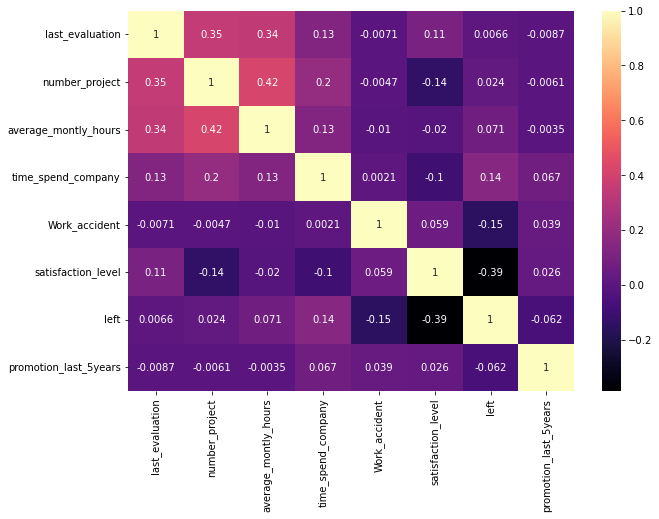

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap='magma')

According to the map above, the number of employees leaving have negative relation with their work satisfaction_level.
i.e., the lower the satisfaction, the great the chances of employee leaving the company. 

In [7]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [9]:
df[['salary','left']]

,salary,left
0,low,1
1,medium,1
2,medium,1
3,low,1
4,low,1
...,...,...
14994,low,1
14995,low,1
14996,low,1
14997,low,1


In [10]:
salary_wise_left=df.groupby(['left','salary']).size().unstack().fillna(0)
salary_wise_left

salary,high,low,medium
left,,,
0,1155,5144,5129
1,82,2172,1317


<AxesSubplot:xlabel='left'>

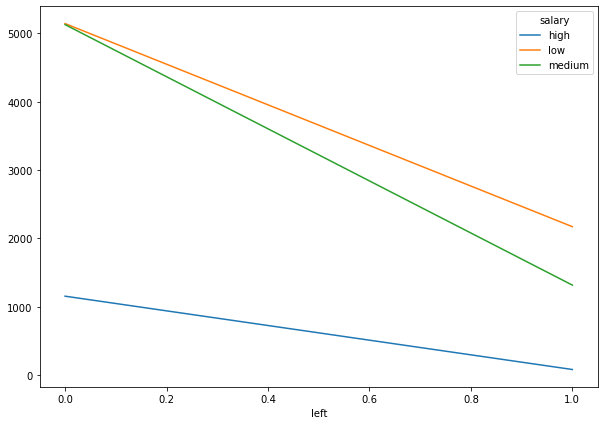

In [11]:
salary_wise_left.plot(figsize=(10,7))

Therefore, from above table 42% left are of Low salary group, 25% left are of medium salary group and only 0.07% left are from high salary group

In [12]:
df['role'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [13]:
dummy=pd.get_dummies(df['role'])
dummy

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [14]:
 df=pd.concat([df,dummy], axis=1)

In [15]:
df.head()

,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,satisfaction_level,left,promotion_last_5years,role,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.53,2,157,3,0,0.38,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,0.80,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,0.11,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,0.72,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,0.37,1,0,sales,low,0,0,0,0,0,0,0,1,0,0


In [16]:
x=df[['time_spend_company','satisfaction_level']].values
#dependen
y=df[['left']].values

In [17]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=0)

In [18]:
#Applying logistic Regression model

from sklearn.linear_model import LogisticRegression

classifier= LogisticRegression(random_state=0)
#fitting to training set
classifier.fit(x_train, y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0)

In [19]:
print(classifier.predict([[5,0.3]]))

[1]


In [20]:
print(classifier.predict([[5,0.9]]))

[0]


In [21]:
y_pred=classifier.predict(x_test)

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(y_test, y_pred)
print(cm)

accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

[[3172  290]
 [ 764  274]]
0.7657777777777778


In [23]:
#Applying K-Nearest Neighbours method

from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
classifier.fit(x_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [24]:
print(classifier.predict([[5,0.3]]))

[1]


In [25]:
print(classifier.predict([[3,0.5]]))

[0]


In [26]:
y_pred=classifier.predict(x_test)

In [27]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

[[3342  120]
 [  90  948]]
0.9533333333333334


In [ ]:
module load anaconda/2020 texlive

In [ ]:
jupyter nbconvert --to pdf HR_Prediction.ipynb 

In [ ]:
conda install nbconvert[webpdf]

In [ ]:
conda install pyppeteer